In [1]:
!pip install simple_image_download

INFO: pip is looking at multiple versions of simple-image-download to determine which version is compatible with other requirements. This could take a while.


In [2]:
from simple_image_download import simple_image_download as sid
import os
import cv2
import numpy  as np
import tensorflow as tf

In [3]:
class_names = ['moon', 'sponge bob', 'doraemon']

In [4]:
response= sid.simple_image_download

for class_name in class_names:
    response().download(class_name, 30)

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
inputs = base_model.input
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(3, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,934,531 (68.41 MB)

 Trainable params: 3,219,843 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_data, y_data, epochs = 20)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 15s/step - accuracy: 0.4036 - loss: 16.8763
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 15s/step - accuracy: 0.8601 - loss: 1.5159
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.9488 - loss: 0.6846
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.9898 - loss: 0.0449
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9834 - loss: 0.0353
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.9434 - loss: 0.0833
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 15s/step - accuracy: 0.9717 - loss: 0.0919
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - accuracy: 0.9717 - loss: 0.0585
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.9717 - loss: 0.0601
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 15s/step - accuracy: 0.9795 - loss: 0.0457
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 16s/step - accuracy: 0.9756 - loss: 0.0587
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 15s/step - accuracy: 0.9717 - loss: 0.0496


In [14]:
def img_preprocessing(img):
  img = cv2.imread(img_file)
  img_resized = cv2.resize(img, (224, 224))
  img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
  img_scaled = preprocess_input(img_rgb)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  print(img_batch.shape)
  return img_batch

img = cv2.imread('/content/달.png')
img2 = cv2.imread('/content/sponge.webp')
img_batch = img_preprocessing(img2)

(1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


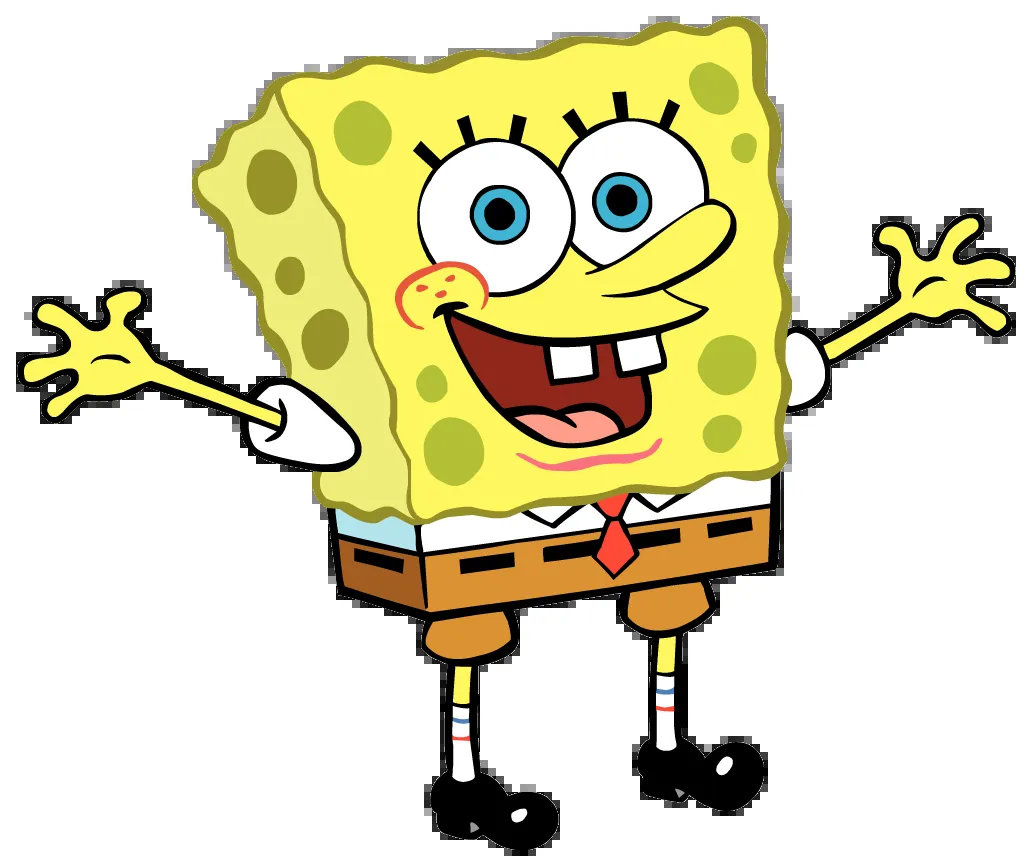

Text(0.5, 1.0, 'doraemon')

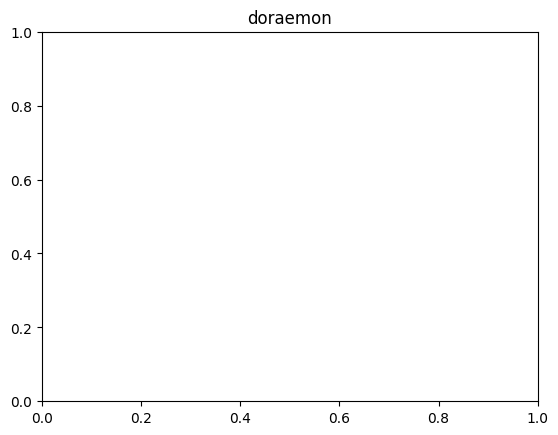

In [16]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
prediction = model.predict(img_batch)
cv2_imshow(img2)
plt.title(class_names[np.argmax(prediction)])

In [8]:
base_dir = '/content/simple_images'
X_data = []
y_data = []
for i, class_name in enumerate(class_names):
  folder_dir = os.path.join(base_dir,class_name)

  for file_name in os.listdir(folder_dir):
    img_file = os.path.join(folder_dir, file_name)
    img = cv2.imread(img_file)
    if img is None:
      pass
    else:
      img_resized = cv2.resize(img, (224, 224))
      img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
      img_scaled = preprocess_input(img_rgb)
      X_data.append(img_scaled)
      y_data.append(i)

X_data =np.array(X_data)
y_data =np.array(y_data)
print(X_data.shape)
print(y_data.shape)

(79, 224, 224, 3)
(79,)


위에 거 보기

In [ ]:
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224,224,3))
base_model.trainable = False
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,322,563 (62.27 MB)

 Trainable params: 1,607,875 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_data, y_data, epochs = 5)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step - accuracy: 0.5358 - loss: 5.2708
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 12s/step - accuracy: 0.8296 - loss: 1.4601
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.9480 - loss: 0.2176
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.9792 - loss: 0.0723
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 12s/step - accuracy: 0.9636 - loss: 0.1128


In [ ]:
img_file = '/content/jung.jpg'

def img_preprocess(img_file):
  img = cv2.imread(img_file)
  img_resized = cv2.resize(img, (224, 224))
  img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
  img_scaled = preprocess_input(img_rgb)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  print(img_batch.shape)
  return img_batch

img = img_preprocess(img_file)
prediction = model.predict(img)
print(np.argmax(prediction))

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
2


Text(0.5, 1.0, 'jung woo sung')

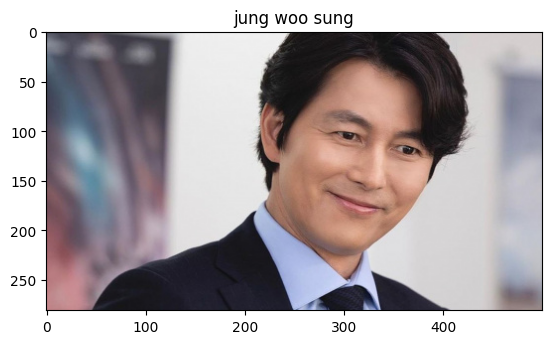

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread(img_file)
plt.imshow(img)
plt.title(class_names[2])